# TE62MI - Algebre linéaire et réduction de dimension

## TP3. Mise en échelle multidimensionnelle (MDS)

### Description
L'objectif de ce TP est d'étudier la mise en échelle multidimensionelle (MDS) comme méthode de réduction de dimensionnalité, sur des données réelles.


### MDS (mise à l'échelle multidimensionnelle)

À partir des informations contenues dans une matrice de distance, le but
de MDS consiste à placer chaque point dans un espace à k dimensions de sorte que les distances entre points soient préservées au mieux.
Le pseudo code est de l'algorithme MDS est donné ci-dessous pour une matrice carrée $nxn$ de distances $D$.

1. Calculer la matrice $J = I_N - N^{-1}11^T$ (où $I_N$ la matrice identité $nxn$ et $11^T$ est la matrice $NxN$ avec des uns à chaque cellule)
2. Calculer la matrice $B = \frac{1}{2}JDJ$
3. Calculer la décomposition SVD de la matrice $B$ : $B = U\Sigma V^T$, et extraire les k plus grandes valeurs singulieres
$\Sigma_k = diag(\sigma_1; \sigma_2... \sigma_k)$ et les vecteurs singuliers correspondants $U_k$
4. Une représentation spatiale $k$-dimensionnelle des N objets est obtenue par : $X_k = U_k \Sigma_k^{\frac{1}{2}}$.

MDS minimise le stress donné par 

\begin{equation}
    Stress = \sqrt{ \frac{\sum_{ij} (d_{ij} - \delta_{ij} )^2 }{ \sum_{ij} \delta_{ij}^2 }}
\end{equation}

où $d_{ij}$ la distance entre les points $i$ et $j$ après la transformation et $\delta_{ij}$ leur distance dans l'espace d'origine.

### Tâches à effectuer dans ce TP


Ici, MDA sera appliqué pour représenter la position de 10 villes américaines dans
un espace à 2 dimensions, en utilisant la matrice de distance 10 x 10 $D$. 
Compléter les champs de code manquant, entre `### TODO ###` et `### ENDO ###`, afin de
mettre en œuvre la technique MDS.
- Compléter la fonction `my_MDS` afin d'appliquer l'algoirthme sur une matrice de distance $D$ et représenter des données dans un espace de dimension $k$ défini par les k premières composantes principales.  (`section 2`)
- Tester votre implémentation. Inspecter la distribution des valeurs singulières de $X$. (`section 3`) 
- Visualiser les données en 2D. Qu'observez-vous ? La position des villes préserve-t-elle les distances ? (`section 4`) 
- Calculer le stress de l'approximation/reconstruction? (`section 4`)
- Tester avec un autre dataset de votre choix (`section 1`)

## 1. Load the cities' distances dataset

In [1]:
import numpy as np

# Load the distance matrix
D = np.loadtxt('data/distanceMatrix.csv', delimiter=',')
cities = ['Atlanta','Chicago','Denver','Houston','LA','Miami','NYC','SF','Seattle','Washington DC']
n = D.shape[0] # Get the size of the matrix
print(D.shape)

(10, 10)


## 2. Implement MDS

In [2]:
def my_MDS(D, k=2):
    ''' MDS algorithm. Applies MDS on D.
    Returns:
        X: nd.array (n,k), low dimension representation
        L: nd.array (n,) singular values
    '''
    
    # Calculer J
    
    ### TODO ###
    J = np.eye(n) - (1.0/n) * np.ones(n)
    ### ENDO ###
    
    # Calculer B
    
    ### TODO ###
    B = -(1.0/2) * np.dot(J,np.dot(pow(D,2),J))
    ### ENDO ###
    
    ### Apply SVD to B ###
    
    ### TODO ###     
    U,L,V = np.linalg.svd(B)
    ### ENDO ###
    
    # Calculate new representation
    
    ### TODO ###
    X = np.dot(U[:,:k],np.sqrt(np.diag(L)[:k,:k]))
    ### ENDO ###
    return X, L

In [3]:
k = 2 # we want to keep 2 dimensions
X, L = my_MDS(D, k=k)

## 3. Test your implementation

In [4]:
assert X.shape == (n, k)

In [5]:
# Inspecter la distribution des valeurs singulières

### TODO ###
print(L[:k]/np.sum(L[:k]))
### ENDO ###

[0.85031276 0.14968724]


## 4. Visualize results

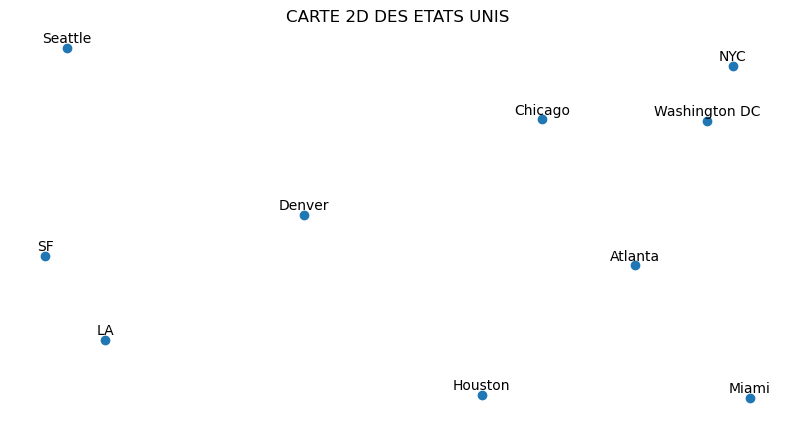

In [6]:
import matplotlib.pyplot as plt

# Visualiser les données en 2D

### TODO ###
# Qu'observez-vous ?
# La position des villes préserve-t-elle les distances ? 
### ENDO ###

# Plot distances in two dimensions
plt.figure(1, figsize=(10,5))

# Plot cities in 2D space
plt.plot(-X[:,0],-X[:,1],'o')
for i in range(len(cities)):
     plt.text(-X[i,0], -X[i,1]+30, cities[i], color='k', ha='center', va='center')
plt.title("CARTE 2D DES ETATS UNIS")
plt.axis('off')
plt.show()

In [7]:
# Calculer le stress de l'approximation/reconstruction

### TODO ###
#
### ENDO ###